<a href="https://colab.research.google.com/github/LiCunxinn/CP02_SERS/blob/main/SolarRadiationPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DISCIPLINA: SOLUÇÕES EM ENERGIAS RENOVÁVEIS E SUSTENTÁVEIS**


Exercício 1 – Classificação (Solar)

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar dataset
df = pd.read_csv('SolarPrediction.csv')

In [ ]:
# Criar variável-alvo (alta/baixa radiação)
threshold = df["Radiation"].median()
df["Target"] = np.where(df["Radiation"] >= threshold, 1, 0)  # 1 = Alta, 0 = Baixa

In [ ]:
# Selecionar atributos (remover colunas não numéricas)
X = df.drop(columns=["Radiation", "TimeSunRise", "TimeSunSet", "Data", "Time", "Target"], errors="ignore")
y = df["Target"]

In [ ]:
# Separar treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Normalizar atributos contínuos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Definir modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}


Decision Tree
Acurácia: 0.9433
Matriz de Confusão:


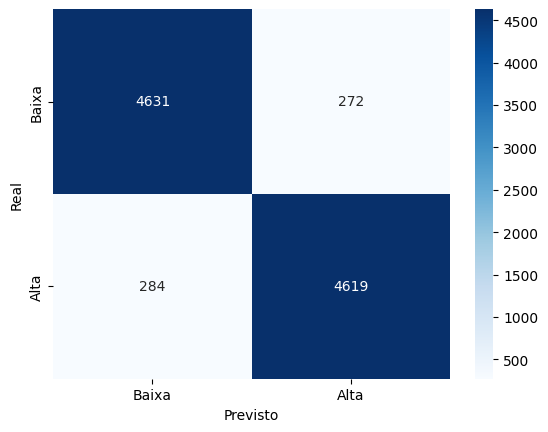


Random Forest
Acurácia: 0.9438
Matriz de Confusão:


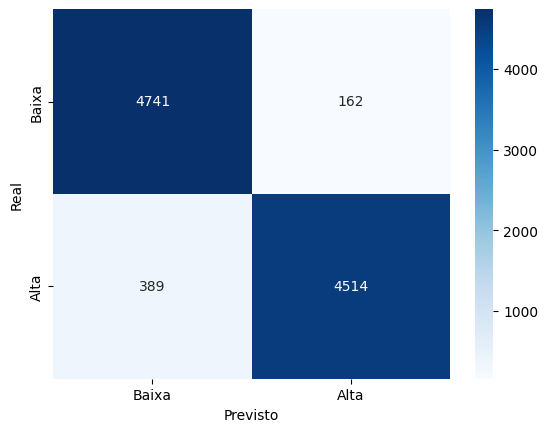


SVM
Acurácia: 0.8495
Matriz de Confusão:


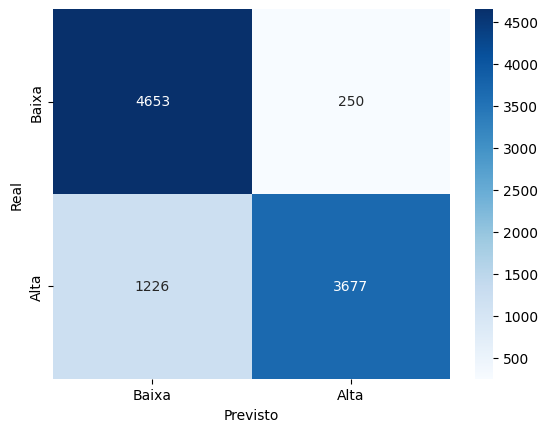

In [ ]:
# Treinar, prever e avaliar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {"Accuracy": acc, "ConfusionMatrix": cm}

    print(f"\n{name}")
    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:")

    # Plot da matriz de confusão
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixa", "Alta"], yticklabels=["Baixa", "Alta"])
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()